# Tenis Oyuncuları Tespit Modeli Eğitimi

Bu notebook YOLOv8 kullanarak tenis oyuncularını tespit eden bir model eğitir.

## 1. Kütüphane Kurulumu

In [2]:
# Gerekli kütüphaneleri yükle
!pip install roboflow ultralytics -q

loading Roboflow workspace...
loading Roboflow project...
loading Roboflow project...



Extracting Dataset Version Zip to Jugadores-Tenis-1 in yolov8:: 100%|██████████| 13906/13906 [00:01<00:00, 8699.26it/s] 
Extracting Dataset Version Zip to Jugadores-Tenis-1 in yolov8:: 100%|██████████| 13906/13906 [00:01<00:00, 8699.26it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## 2. Veri Seti İndirme

In [ ]:
# Roboflow'dan veri setini indir
from roboflow import Roboflow

rf = Roboflow(api_key="uwbLCWSnHV2geuphu3jv")
project = rf.workspace("deneme-nq1dn").project("jugadores-tenis-ewdex")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
loading Roboflow project...


## 3. Kütüphaneleri Import Et

In [2]:
# Gerekli kütüphaneleri import et
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
from IPython.display import Image as IPImage, display
import shutil
import glob

In [10]:
# Veri seti yolunu belirle
dataset_location = dataset.location
data_yaml_path = os.path.join(dataset_location, "data.yaml")
print(f"Veri seti yolu: {data_yaml_path}")

NameError: name 'dataset' is not defined

## 4. Model Eğitimi (40 Epoch)

In [9]:
# YOLOv8 modelini yükle ve 40 epoch ile eğit
model = YOLO('yolov8n.pt')  # Pretrained YOLOv8 nano model

# Modeli eğit
results = model.train(
    data=data_yaml_path,
    epochs=40,
    imgsz=640,
    batch=16,
    name='kort_detection',
    patience=10,
    save=True,
    plots=True
)

NameError: name 'data_yaml_path' is not defined

## 5. Modeli Değerlendir

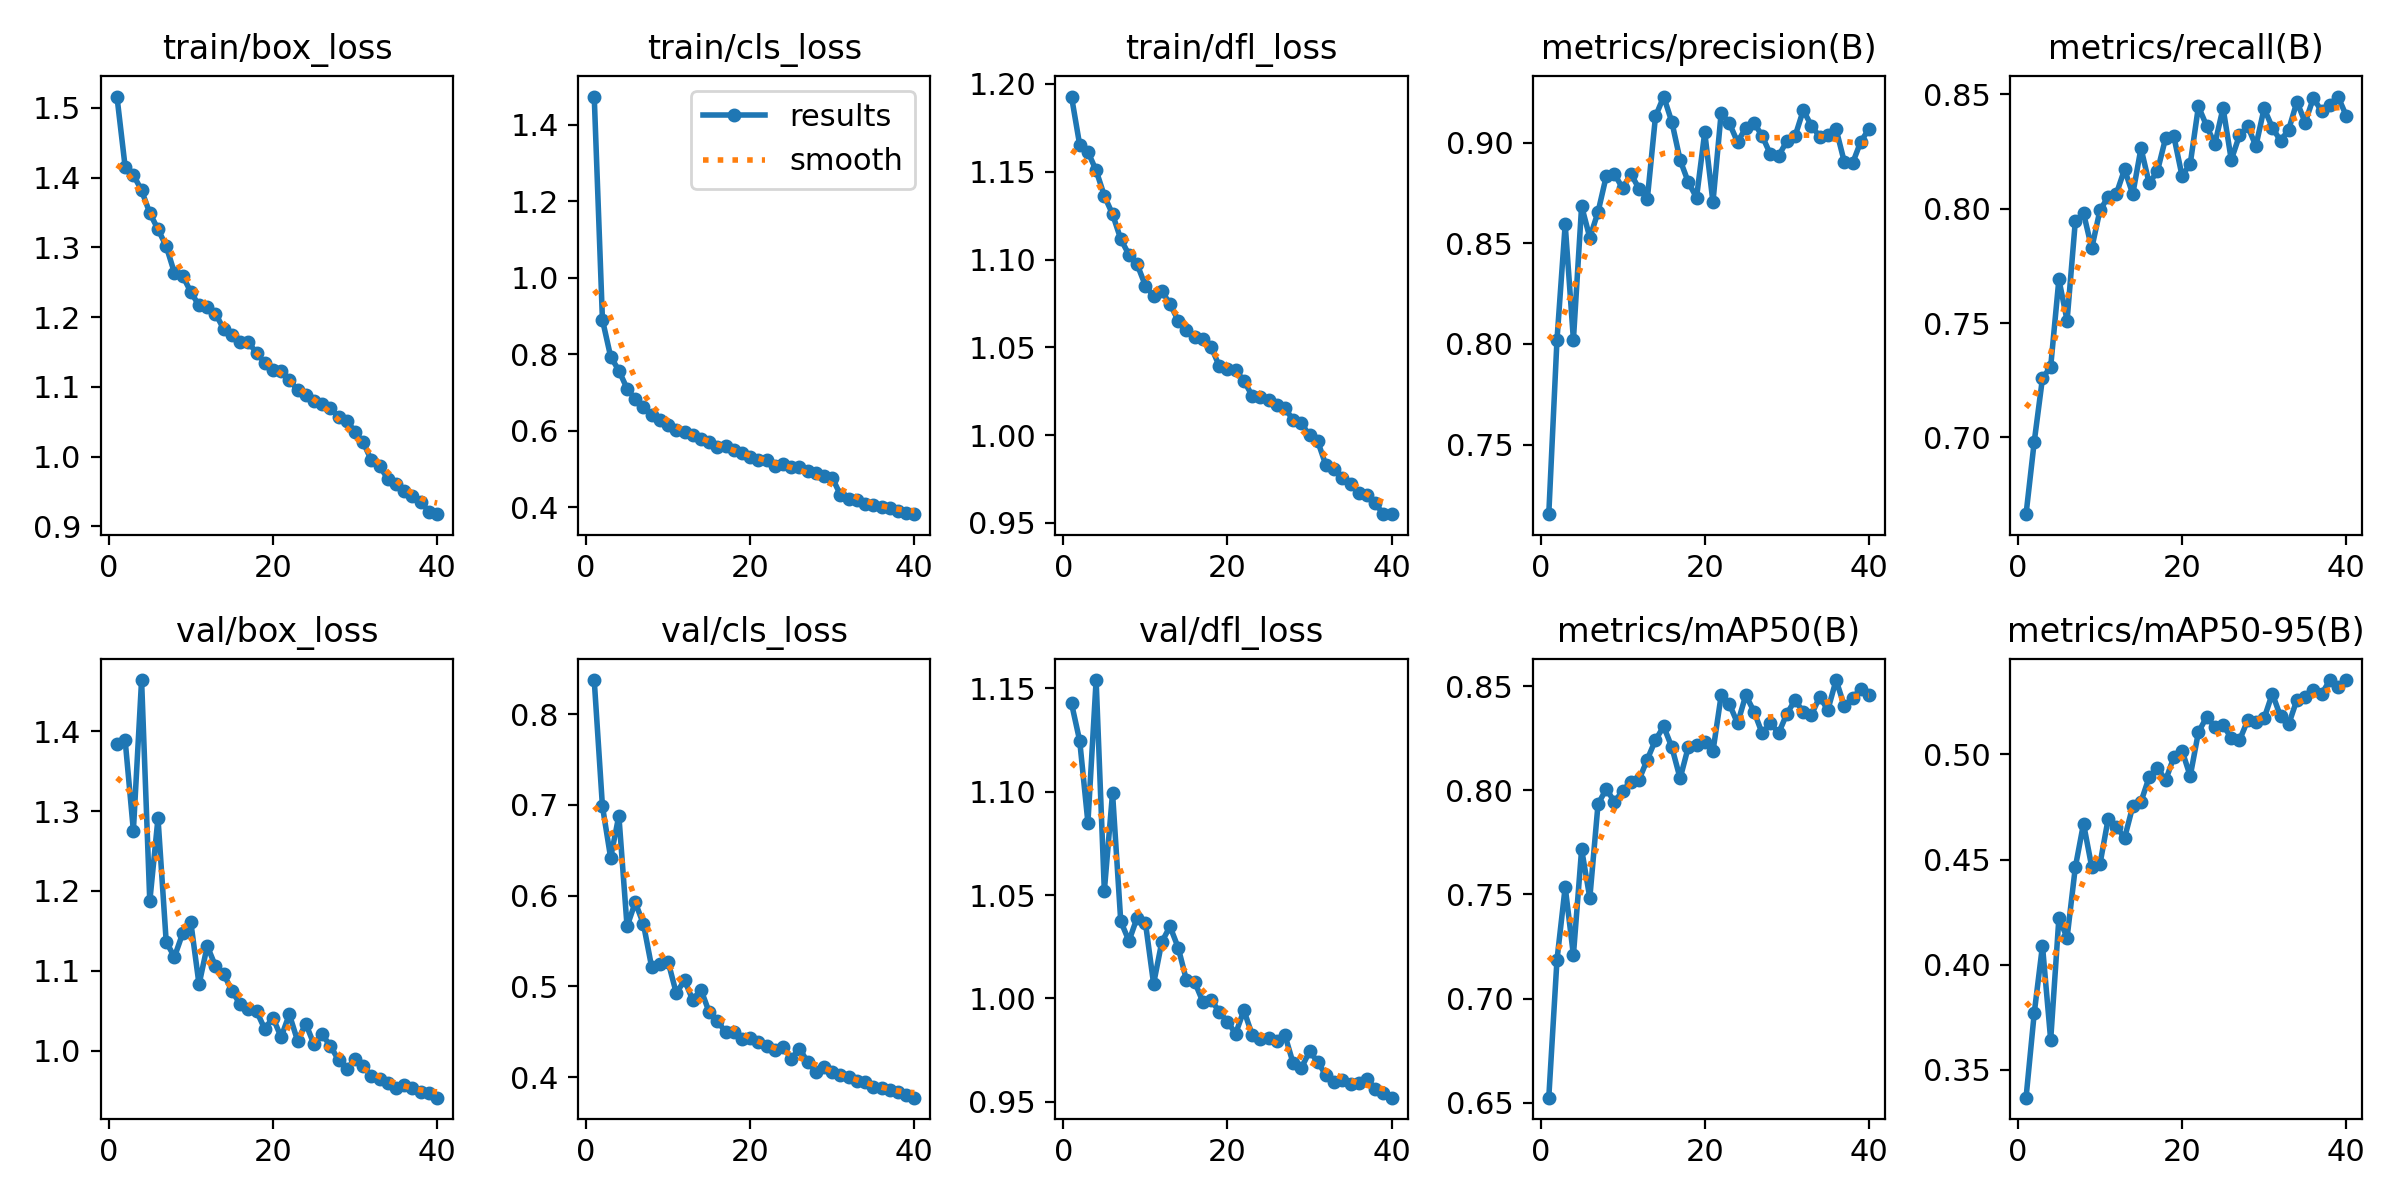

Eğitim sonuçları grafiği


In [8]:
# Eğitim sonuçlarını görselleştir
results_path = 'runs/detect/kort_detection/results.png'
if os.path.exists(results_path):
    display(IPImage(filename=results_path))
    print("Eğitim sonuçları grafiği")
else:
    print("Sonuç grafiği bulunamadı")

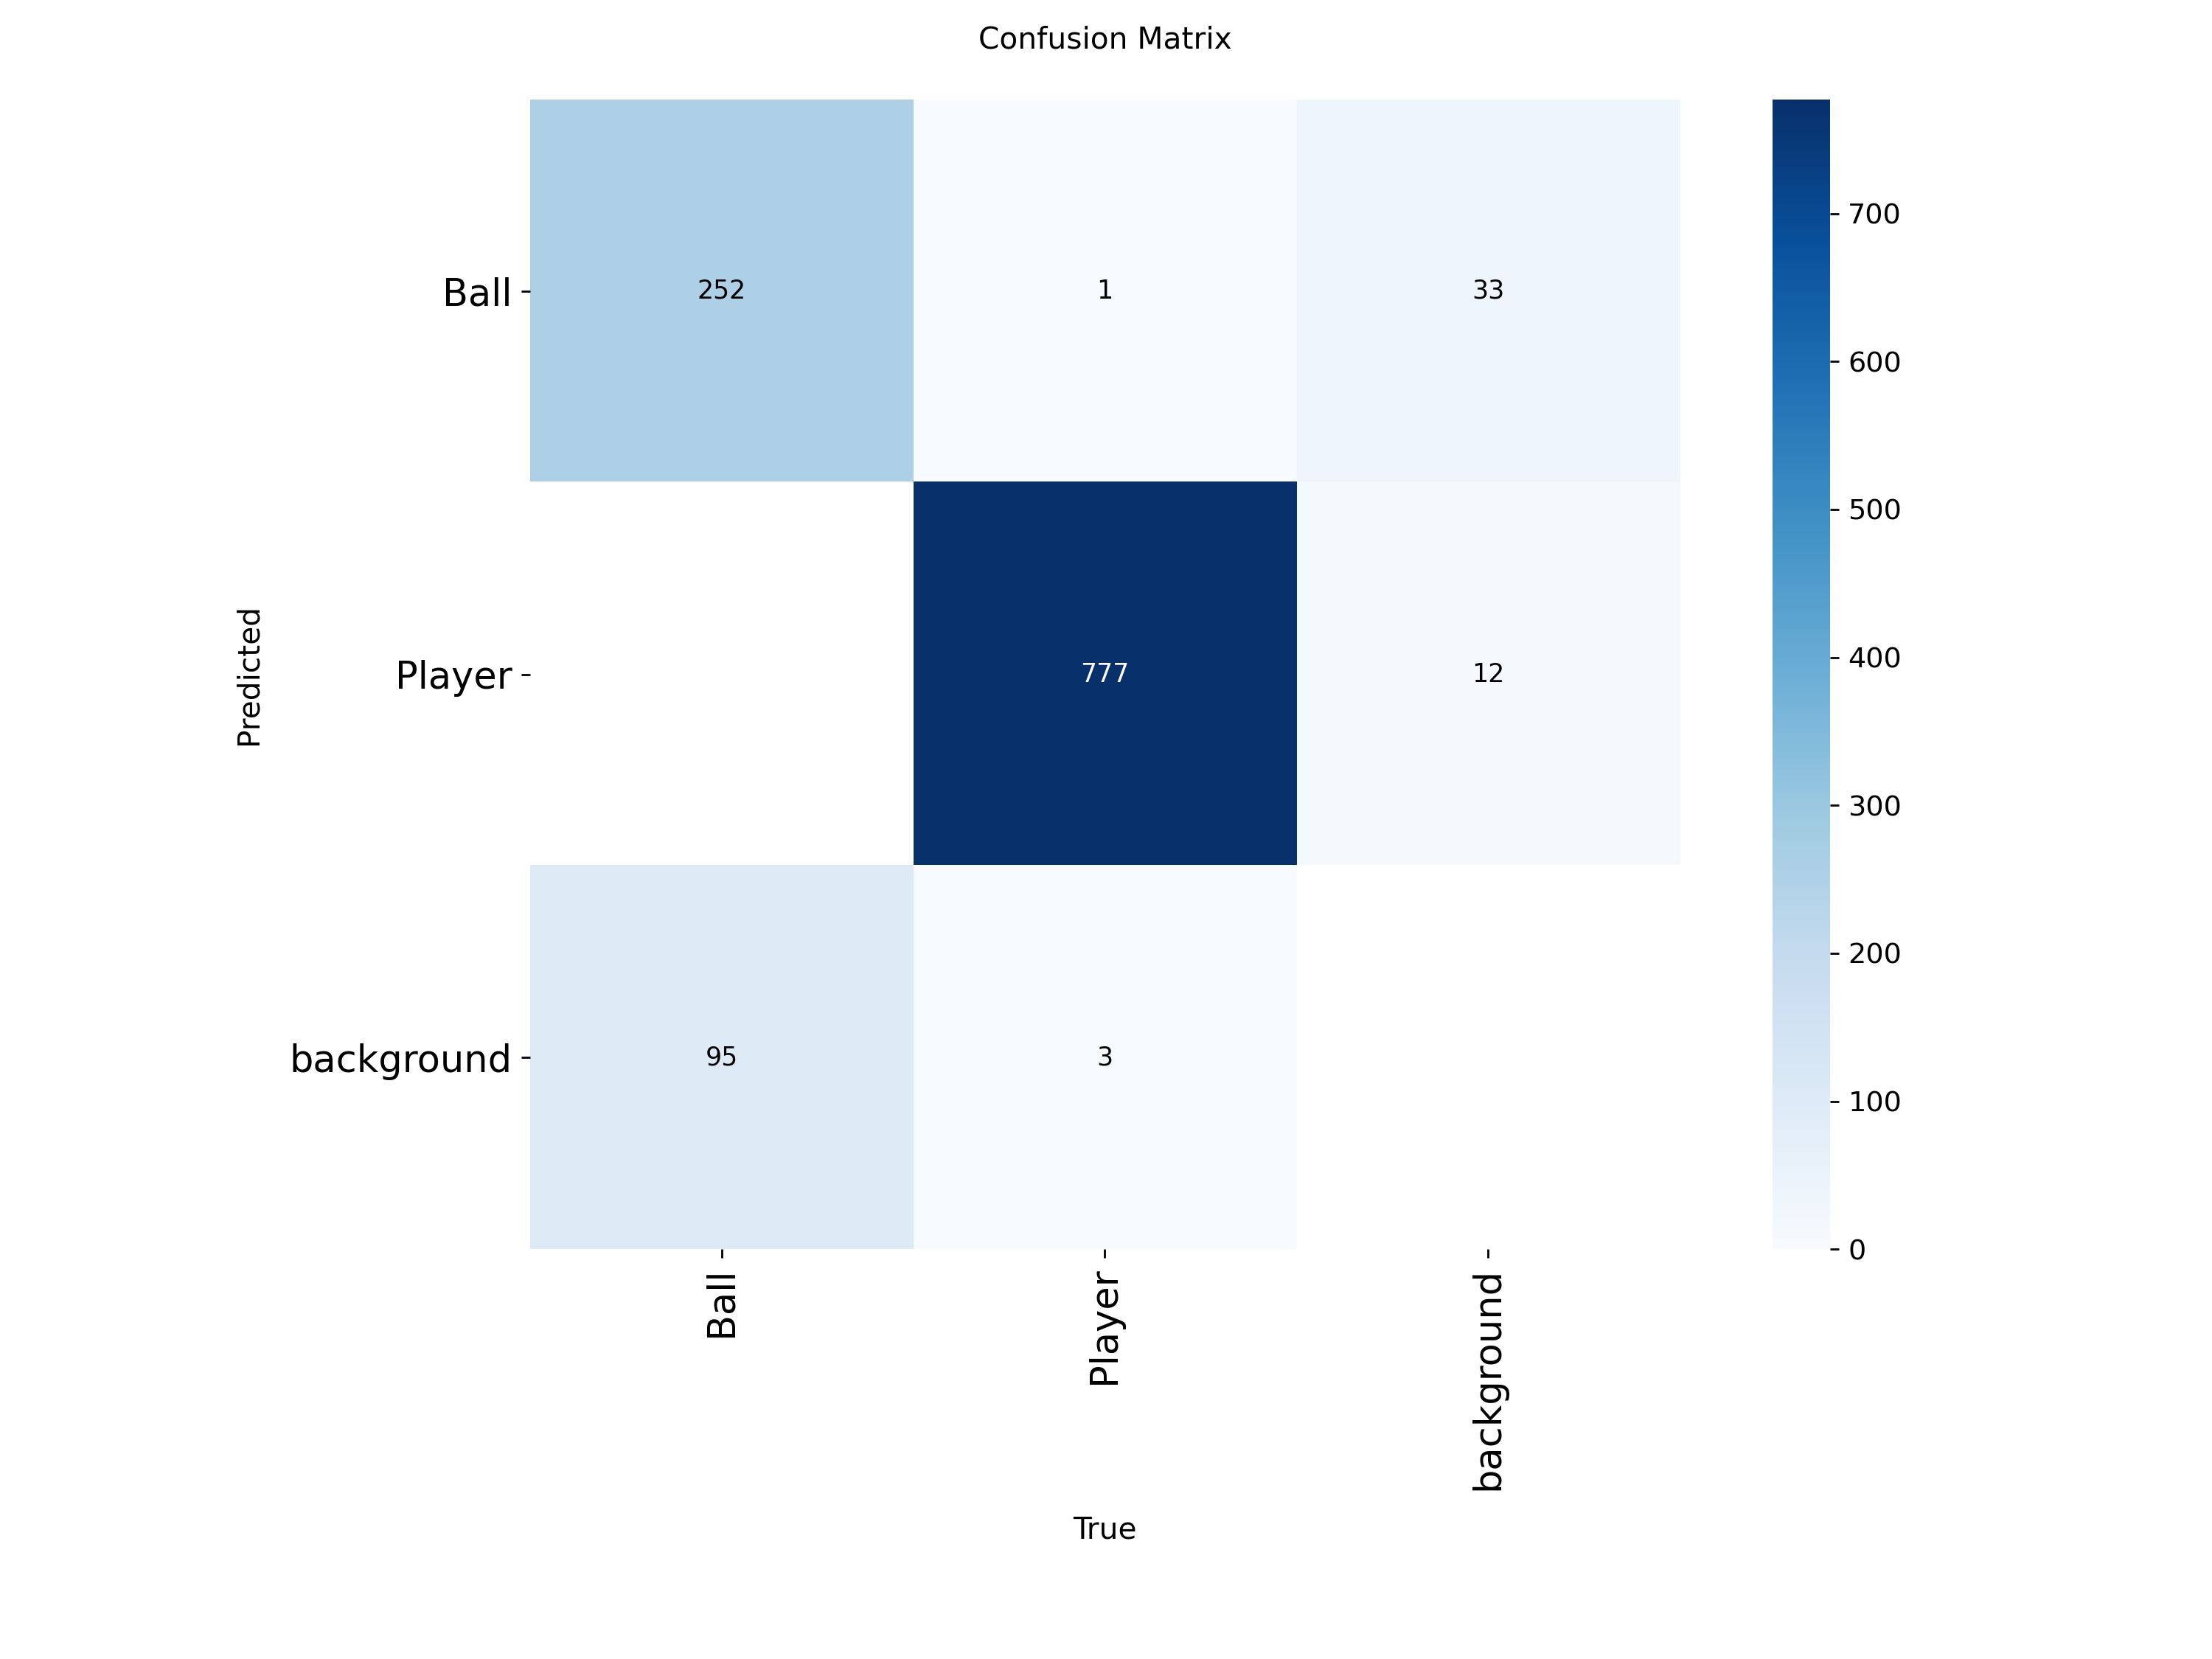

Confusion Matrix


In [9]:
# Confusion Matrix'i görselleştir
confusion_matrix_path = 'runs/detect/kort_detection/confusion_matrix.png'
if os.path.exists(confusion_matrix_path):
    display(IPImage(filename=confusion_matrix_path))
    print("Confusion Matrix")
else:
    print("Confusion Matrix bulunamadı")

## 6. Modeli Kaydet

In [8]:
# En iyi modeli kort_best.pt olarak kaydet
import os
import shutil

best_model_path = 'runs/detect/kort_detection/weights/best.pt'
save_path = r'C:\Users\User\Desktop\kort\kort_best.pt'

if os.path.exists(best_model_path):
    shutil.copy(best_model_path, save_path)
    print(f"✓ Model kaydedildi: {save_path}")
    print(f"✓ Dosya boyutu: {os.path.getsize(save_path) / (1024*1024):.2f} MB")
    print(f"✓ Dosya kontrolü: {os.path.exists(save_path)}")
else:
    print(f"❌ Model bulunamadı: {best_model_path}")
    print("Mevcut runs klasörü içeriği:")
    if os.path.exists('runs/detect'):
        print(os.listdir('runs/detect'))

❌ Model bulunamadı: runs/detect/kort_detection/weights/best.pt
Mevcut runs klasörü içeriği:


## 7. Modeli Test Et - Değerlendirme Metrikleri

In [11]:
# Test veri seti ile modeli değerlendir
model_path = r'C:\Users\User\Desktop\kort\kort_best.pt'

if os.path.exists(model_path):
    best_model = YOLO(model_path)
    
    # Test veri seti üzerinde değerlendirme
    test_results = best_model.val(data=data_yaml_path, split='test')
    
    # Metrikleri yazdır
    print("\n=== Test Sonuçları ===")
    print(f"mAP50: {test_results.box.map50:.4f}")
    print(f"mAP50-95: {test_results.box.map:.4f}")
    print(f"Precision: {test_results.box.mp:.4f}")
    print(f"Recall: {test_results.box.mr:.4f}")
else:
    print(f"❌ Model bulunamadı: {model_path}")

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1437.3±522.7 MB/s, size: 51.8 KB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1437.3±522.7 MB/s, size: 51.8 KB)
val: Scanning /content/Jugadores-Tenis-1/test/labels... 53 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 53/53 1.4Kit/s 0.0s
val: New cache created: /content/Jugadores-Tenis-1/test/labels.cache
val: Scanning /content/Jugadores-Tenis-1/test/labels... 53 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 53/53 1.4Kit/s 0.0s
val: New cache created: /content/Jugadores-Tenis-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.8it/s 1.4s0.6s
                 Class     Images  Instances   

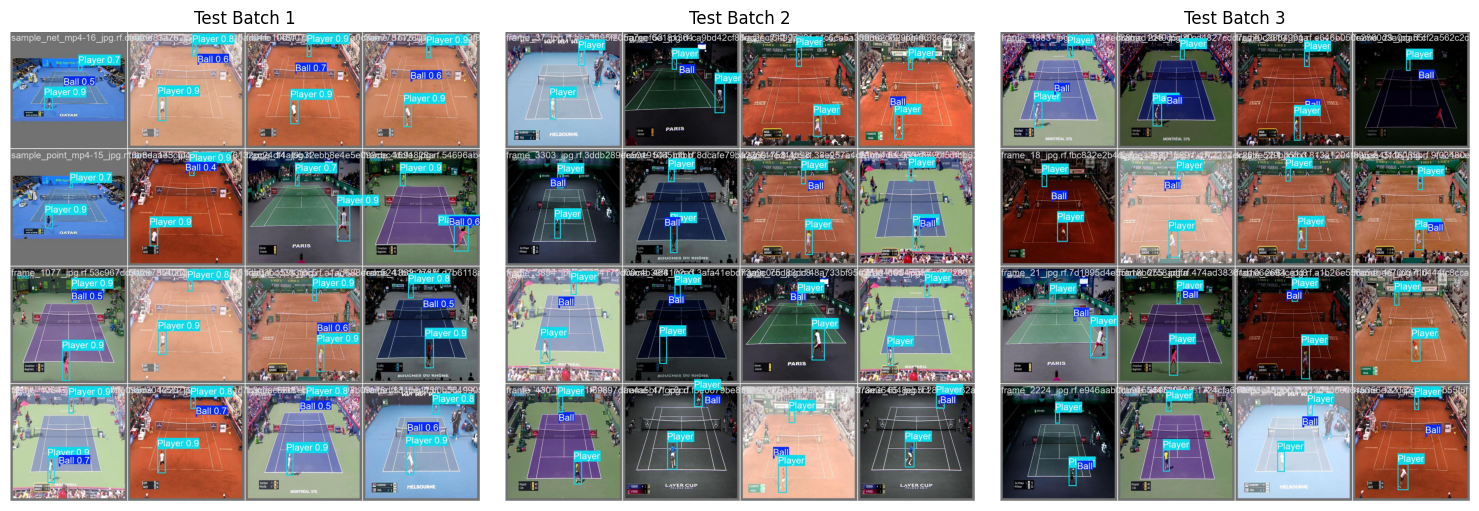

Test batch görüntüleri


In [12]:
# Test sonuçlarını görselleştir
test_images = glob.glob('runs/detect/val*/labels/*.txt')
if test_images:
    print(f"\n{len(test_images)} test görseli işlendi")
    
# Validation sonuçlarını göster
val_batch_path = glob.glob('runs/detect/val*/val_batch*.jpg')
if val_batch_path:
    fig, axes = plt.subplots(1, min(3, len(val_batch_path)), figsize=(15, 5))
    if len(val_batch_path) == 1:
        axes = [axes]
    
    for idx, img_path in enumerate(val_batch_path[:3]):
        img = Image.open(img_path)
        if len(val_batch_path) > 1:
            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f'Test Batch {idx+1}')
        else:
            axes[0].imshow(img)
            axes[0].axis('off')
            axes[0].set_title('Test Batch')
    
    plt.tight_layout()
    plt.show()
    print("Test batch görüntüleri")

## 8. Kendi Görsel ve Video ile Test

Aşağıdaki hücreleri kullanarak modelinizi kendi görsel ve videolarınızla test edebilirsiniz:

🖼️ Görsel testi başlatılıyor...

image 1/1 C:\Users\User\Desktop\kort\tk.PNG: 384x640 2 Players, 106.3ms
Speed: 27.6ms preprocess, 106.3ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\User\runs\detect\predict
image 1/1 C:\Users\User\Desktop\kort\tk.PNG: 384x640 2 Players, 106.3ms
Speed: 27.6ms preprocess, 106.3ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to C:\Users\User\runs\detect\predict


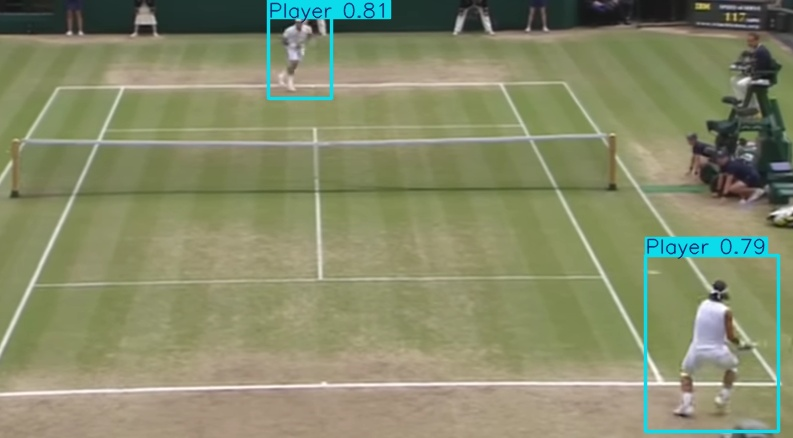


✅ Görsel testi tamamlandı!
✅ Tespit edilen nesne sayısı: 2
✅ Sonuç kaydedildi: C:\Users\User\Desktop\kort\test_result.jpg


In [3]:
# Görsel ile test
print("🖼️ Görsel testi başlatılıyor...")

# Model ve görsel yolları
model_path = r'C:\Users\User\Desktop\kort\kort_best.pt'
test_image_path = r'C:\Users\User\Desktop\kort\tk.PNG'
output_path = r'C:\Users\User\Desktop\kort\test_result.jpg'

# Model yükle ve tahmin yap
model_test = YOLO(model_path)
results = model_test.predict(test_image_path, save=True, conf=0.25)

# İlk sonucu göster ve kaydet
if results:
    result = results[0]
    result.save(filename=output_path)
    
    # Jupyter'de göster
    display(IPImage(filename=output_path))
    
    # Tespit edilen nesneleri göster
    boxes = result.boxes
    print(f"\n✅ Görsel testi tamamlandı!")
    print(f"✅ Tespit edilen nesne sayısı: {len(boxes)}")
    print(f"✅ Sonuç kaydedildi: {output_path}")
else:
    print("❌ Tahmin yapılamadı")

In [4]:
# Video ile test
print("🎥 Video testi başlatılıyor...")

# Model ve video yolları
model_path = r'C:\Users\User\Desktop\kort\kort_best.pt'
test_video_path = r'C:\Users\User\Desktop\kort\tenis_test.mp4'
output_dir = r'C:\Users\User\Desktop\kort'

# Video bilgilerini al
cap = cv2.VideoCapture(test_video_path)
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

print(f"📹 Video bilgisi: {width}x{height}, {fps} FPS, {total_frames} frame")
print(f"⏳ İşleniyor (bu birkaç dakika sürebilir)...")

# Model yükle ve video üzerinde tahmin yap
model_video = YOLO(model_path)
results = model_video.predict(
    source=test_video_path,
    save=True,
    project=output_dir,
    name='video_output',
    conf=0.25,
    save_txt=False
)

print(f"\n✅ Video testi tamamlandı!")
print(f"✅ Sonuç klasörü: {output_dir}\\video_output")
print(f"📁 İşlenmiş video orada bulunur")

🎥 Video testi başlatılıyor...
📹 Video bilgisi: 720x1280, 29 FPS, 1072 frame
⏳ İşleniyor (bu birkaç dakika sürebilir)...

WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in result